In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/afnanrahman/EAFP/main/data/clean_data.csv'

data = pd.read_csv(url)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1470 non-null   int64  
 1   age                        1470 non-null   int64  
 2   attrition                  1470 non-null   int64  
 3   business_travel            1470 non-null   int64  
 4   daily_rate                 1470 non-null   int64  
 5   department                 1470 non-null   int64  
 6   distance_from_home         1470 non-null   int64  
 7   education                  1470 non-null   int64  
 8   education_field            1470 non-null   int64  
 9   employee_number            1470 non-null   int64  
 10  environment_satisfaction   1470 non-null   int64  
 11  gender                     1470 non-null   int64  
 12  hourly_rate                1470 non-null   int64  
 13  job_involvement            1470 non-null   int64

In [ ]:
data[['daily_rate', 'hourly_rate', 'monthly_rate']].corr()

,daily_rate,hourly_rate,monthly_rate
daily_rate,1.000000,0.023381,-0.032182
hourly_rate,0.023381,1.000000,-0.015297
monthly_rate,-0.032182,-0.015297,1.000000


Interesting how there's a difference for daily/hourly/monthly. Thought correlation would be much higher. Is rate not the same as salary maybe?

In [ ]:
data[['attrition', 'total_working_years', 'years_at_company', 'monthly_rate']]

,attrition,total_working_years,years_at_company,monthly_rate
0,1,8,6,19479
1,0,10,10,24907
2,1,7,0,2396
3,0,8,8,23159
4,0,6,2,16632
...,...,...,...,...
1465,0,17,5,12290
1466,0,9,7,21457
1467,0,6,6,5174
1468,0,17,9,13243


Let's first try to find a relationship between attrition rate and years of past experience

In [ ]:
data[['attrition', 'total_working_years', 'years_at_company', 'daily_rate']].corr()

,attrition,total_working_years,years_at_company,daily_rate
attrition,1.000000,-0.171063,-0.134392,-0.056652
total_working_years,-0.171063,1.000000,0.628133,0.014515
years_at_company,-0.134392,0.628133,1.000000,-0.034055
daily_rate,-0.056652,0.014515,-0.034055,1.000000


Let's try seeing it more visually. I'll create a graph with attrition as dependent variable

[[0, 0.45454545454545453], [1, 0.49382716049382713], [2, 0.2903225806451613], [3, 0.21428571428571427], [4, 0.19047619047619047], [5, 0.18181818181818182], [6, 0.176], [7, 0.2222222222222222], [8, 0.1553398058252427], [9, 0.10416666666666667], [10, 0.12376237623762376], [11, 0.19444444444444445], [12, 0.10416666666666667], [13, 0.08333333333333333], [14, 0.12903225806451613], [15, 0.125], [16, 0.08108108108108109], [17, 0.09090909090909091], [18, 0.14814814814814814], [19, 0.13636363636363635], [20, 0.06666666666666667], [21, 0.029411764705882353], [22, 0.09523809523809523], [23, 0.09090909090909091], [24, 0.16666666666666666], [25, 0.07142857142857142], [26, 0.07142857142857142], [27, 0.0], [28, 0.07142857142857142], [29, 0.0], [30, 0.0], [31, 0.1111111111111111], [32, 0.0], [33, 0.14285714285714285], [34, 0.2], [35, 0.0], [36, 0.0], [37, 0.0], [38, 0.0], [40, 1.0]]


Text(0, 0.5, 'Attrition Rate %')

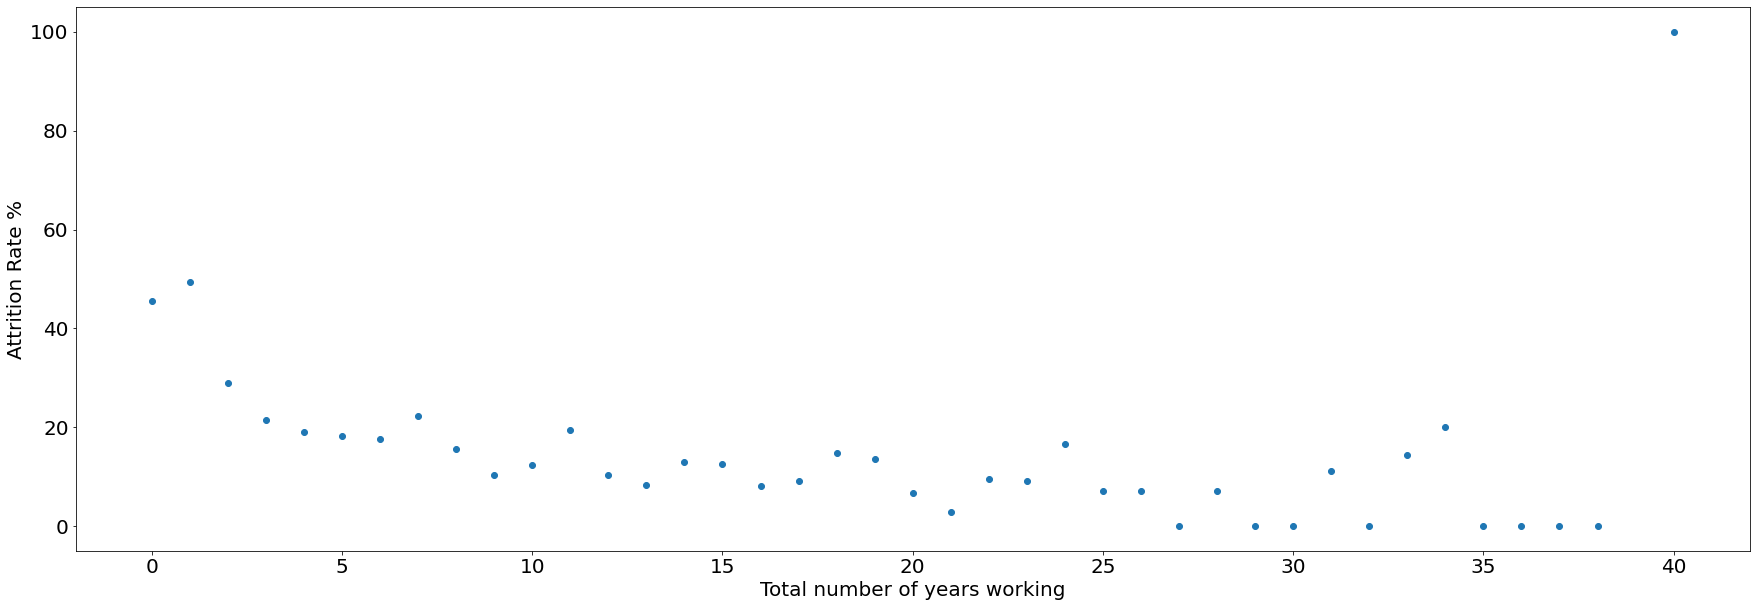

In [ ]:
data_list_x = []
data_list_y = []
for num_years in data['total_working_years'].sort_values().drop_duplicates().values.tolist():
  attrition_rate = data[data['total_working_years'] == num_years]['attrition'].sum() / len(data[data['total_working_years'] == num_years])
  data_list_y.append(attrition_rate * 100)
  data_list_x.append(num_years)
print(data_list)

plt.plot(data_list_x, data_list_y, 'o')
plt.xlabel("Total number of years working")
plt.ylabel("Attrition Rate %")

[[0, 0.45454545454545453], [1, 0.49382716049382713], [2, 0.2903225806451613], [3, 0.21428571428571427], [4, 0.19047619047619047], [5, 0.18181818181818182], [6, 0.176], [7, 0.2222222222222222], [8, 0.1553398058252427], [9, 0.10416666666666667], [10, 0.12376237623762376], [11, 0.19444444444444445], [12, 0.10416666666666667], [13, 0.08333333333333333], [14, 0.12903225806451613], [15, 0.125], [16, 0.08108108108108109], [17, 0.09090909090909091], [18, 0.14814814814814814], [19, 0.13636363636363635], [20, 0.06666666666666667], [21, 0.029411764705882353], [22, 0.09523809523809523], [23, 0.09090909090909091], [24, 0.16666666666666666], [25, 0.07142857142857142], [26, 0.07142857142857142], [27, 0.0], [28, 0.07142857142857142], [29, 0.0], [30, 0.0], [31, 0.1111111111111111], [32, 0.0], [33, 0.14285714285714285], [34, 0.2], [35, 0.0], [36, 0.0], [37, 0.0], [38, 0.0], [40, 1.0]]


Text(0, 0.5, 'Attrition Rate %')

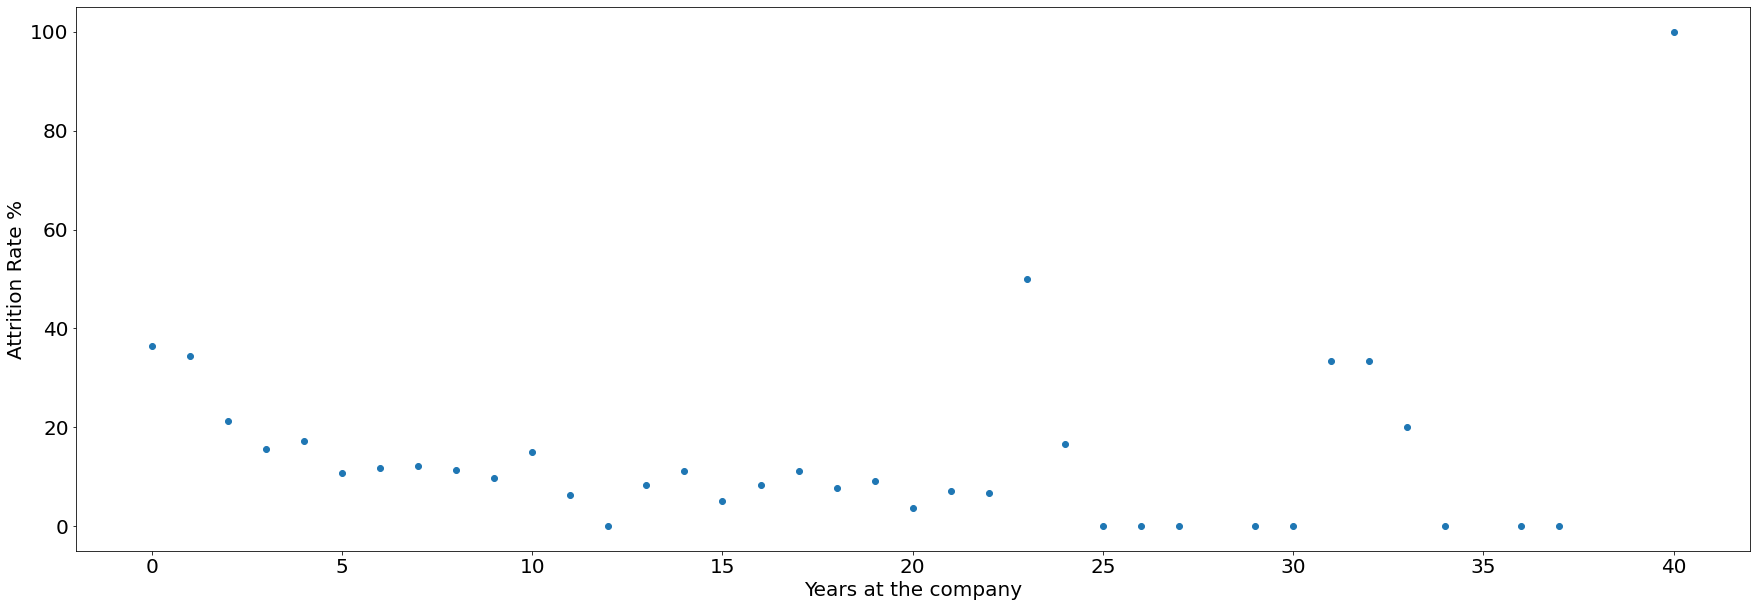

In [ ]:
data_list_x = []
data_list_y = []
for num_years in data['years_at_company'].sort_values().drop_duplicates().values.tolist():
  attrition_rate = data[data['years_at_company'] == num_years]['attrition'].sum() / len(data[data['years_at_company'] == num_years])
  data_list_y.append(attrition_rate * 100)
  data_list_x.append(num_years)
print(data_list)

plt.plot(data_list_x, data_list_y, 'o')
plt.xlabel("Years at the company")
plt.ylabel("Attrition Rate %")

0       3
1       0
2       4
3       4
4       1
       ..
1465    2
1466    2
1467    0
1468    3
1469    2
Name: salary_bin, Length: 1470, dtype: int64
[[0, 0.45454545454545453], [1, 0.49382716049382713], [2, 0.2903225806451613], [3, 0.21428571428571427], [4, 0.19047619047619047], [5, 0.18181818181818182], [6, 0.176], [7, 0.2222222222222222], [8, 0.1553398058252427], [9, 0.10416666666666667], [10, 0.12376237623762376], [11, 0.19444444444444445], [12, 0.10416666666666667], [13, 0.08333333333333333], [14, 0.12903225806451613], [15, 0.125], [16, 0.08108108108108109], [17, 0.09090909090909091], [18, 0.14814814814814814], [19, 0.13636363636363635], [20, 0.06666666666666667], [21, 0.029411764705882353], [22, 0.09523809523809523], [23, 0.09090909090909091], [24, 0.16666666666666666], [25, 0.07142857142857142], [26, 0.07142857142857142], [27, 0.0], [28, 0.07142857142857142], [29, 0.0], [30, 0.0], [31, 0.1111111111111111], [32, 0.0], [33, 0.14285714285714285], [34, 0.2], [35, 0.0], [36, 0.0]

Text(0, 0.5, 'Attrition Rate %')

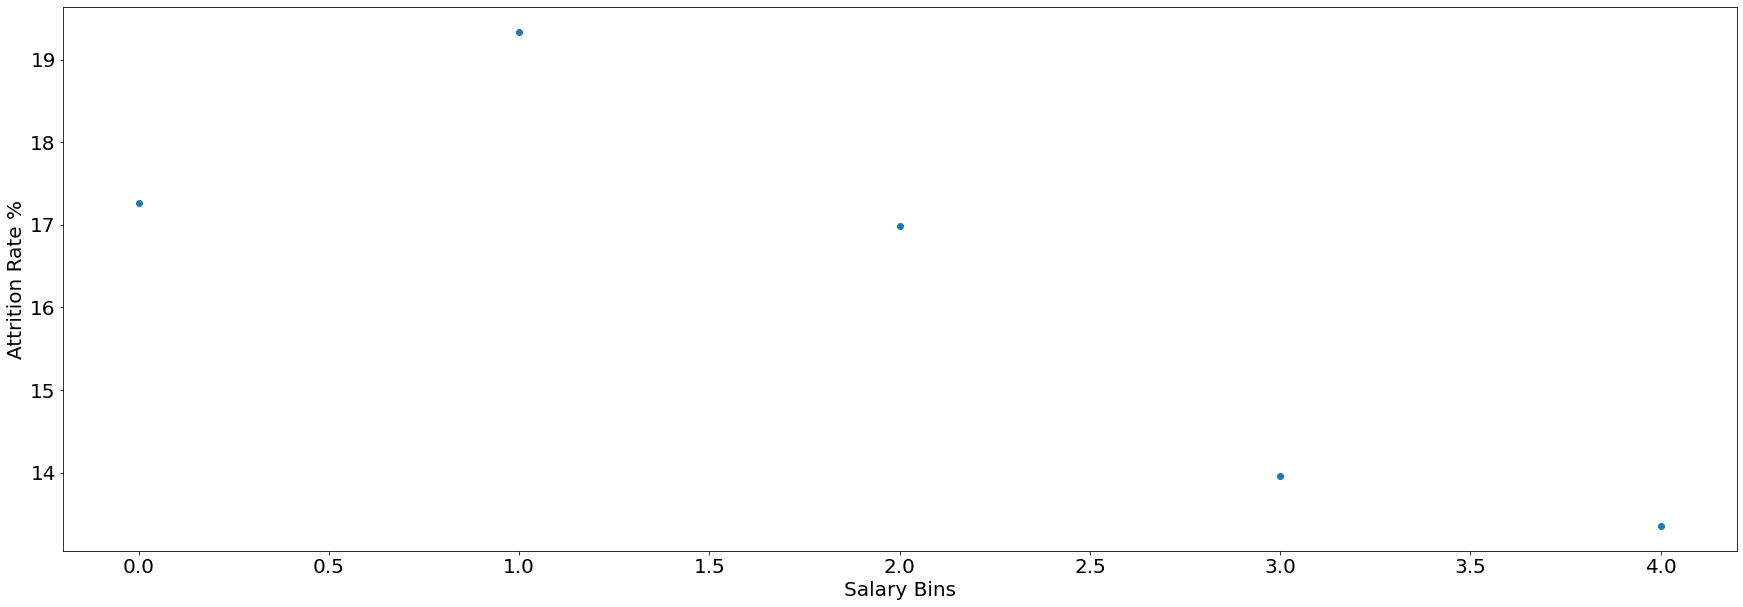

In [ ]:
data_list_x = []
data_list_y = []

# For this one, we want to create an extra boxes for ranges of salaries
salary_ranges = [[0, 300], [300, 600], [600, 900], [900, 1200], [1200, 1500]]

def salary_bin_function(salary):
  if salary <= 300:
    return 0
  elif salary <= 600:
    return 1
  elif salary <= 900:
    return 2
  elif salary <= 1200:
    return 3
  elif salary <= 1500:
    return 4

data["salary_bin"] = data["daily_rate"].apply(salary_bin_function)

print(data['salary_bin'])


for salary in range(4):
  attrition_rate = data[data['salary_bin'] == salary]['attrition'].sum() / len(data[data['salary_bin'] == salary])
  data_list_y.append(attrition_rate * 100)
  data_list_x.append(salary)
print(data_list)

plt.plot(data_list_x, data_list_y, 'o')
plt.axes
plt.xlabel("Salary Bins")
plt.ylabel("Attrition Rate %")